#Section 17.1: Interpolation Problem Statement

##Definition of Interpolation:


Given a data set consisting of independent data values, $x_i$, and dependent data values, $y_i$, where $i$ = 1, 2, 3,..., n. To find an estimation function such that $\widehat y(x_i)$ = $y_i$ for every point in the dataset, we can interpolate its function value using $\widehat y(x*)$, given a new $x*$ value. This is called an interpolation function. 

##Example: 
A dataset shows the population of a city which was recorded every ten years, starting in 1980.

In [14]:
import pandas as pd
import numpy as np
data = np.array([[1980, 100000], 
                 [1990, 127000],
                 [2000, 142000],
                 [2010, 153000],
                 [2020, 160000]])
          
df = pd.DataFrame(data, columns=['year', 'population'])
df

,year,population
0,1980,100000
1,1990,127000
2,2000,142000
3,2010,153000
4,2020,160000


Question: What is the population of the city in 1997?

#Section 17.2: Linear Interpolation

In linear interpolation, the estimated point is assumed to lie on the line joining the nearest points to the left and right. Assume, without loss of generality, that the x-data points are in ascending order; that is, $x_i$ < $x_i$$_+$$_1$, and let x be a point such that $x_i$ < $x$ < $x_i$$_+$$_1$.  
The linear interpolation at $x$ is: $\widehat y(x)$ = $y_i$ + $\frac{{(y_i}{_+}{_1}{ - y_i)}{(x - x_i)}}{{(x_i}{_+}{_1}{ - x_i)}}$. 

In [15]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

In [16]:
f = interp1d(df['year'], df['population'])
y_hat = f(1997)
print(y_hat)

137500.0


The population of the city in 1997 is 137500. 

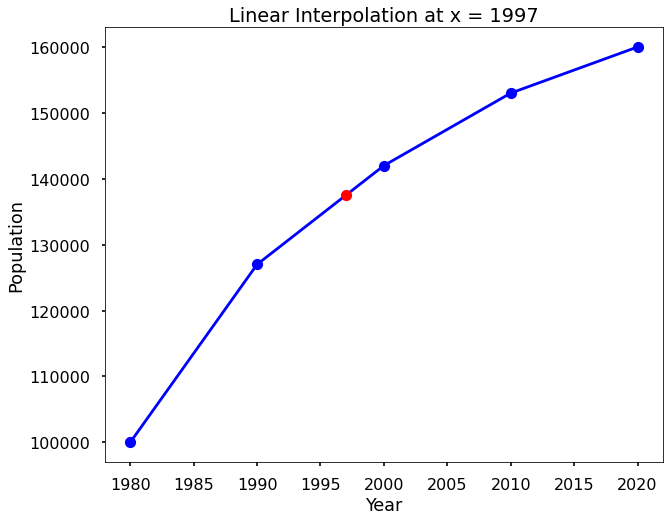

In [20]:
plt.figure(figsize = (10,8))
plt.plot(df['year'], df['population'], '-ob')
plt.plot(1997, y_hat, 'ro')
plt.title('Linear Interpolation at x = 1997')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

Write a function my_lin_interp(x, y, X), where x and y are arrays containing experimental data points, and X is an array. Assume that x and X are in ascending order and have unique elements. The output argument, Y, should be an array, the same size as X, where Y[i] is the linear interpolation of X[i]. You should not use interp from numpy or interp1d from scipy.

In [46]:
def my_lin_interp(x, y, X):
  a = np.array(x)
  b = np.array(y)
  c = np.array(X)
  num1 = 0
  num2 = 0
  den = 0
  rest = 0
  Y = []
  for k in range(len(c)):
    c[k] = float(c[k])
    for i in range(len(a)):
      if a[i] > c[k] and a[i-1] < c[k]:
        match = i
        den = a[i]-a[i-1]
        num1 = c[k] - a[i-1]
        break
    for j in range(len(b)):
      if j == match:
        num2 = b[j] - b[j-1]
        rest = b[j-1]
        break
    Y = Y + [rest + ((num1 * num2)/den)]
  return Y


In [49]:
my_lin_interp(df['year'], df['population'], [1997])

[137500.0]

In [48]:
x = [0, .1, .15, .35, .6, .7, .95, 1]
y = [1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353]
X = [.1013, .315, .729]
my_lin_interp(x, y, X)

[0.8166746, 0.5393349999999999, 0.235348]

In [28]:
#check
g = interp1d(x, y)
y_hat = g(0.1013)
print(y_hat)

0.8166746


In [29]:
#check
g = interp1d(x, y)
y_hat = g(0.315)
print(y_hat)

0.5393349999999999


In [30]:
#check
g = interp1d(x, y)
y_hat = g(0.729)
print(y_hat)

0.235348


#Section 17.3: Cubic Spline Interpolation



In cubic spline interpolation, the interpolating function is a set of piecewise cubic functions. Specifically, we assume that the points ($x_i$, $y_i$) and ($x_i$ $_+$ $_1$, $y_i$ $_+$ $_1$) are joined by a cubic polynomial
$S_i$$(x)$ = $a_ix^3+b_ix^2+c_ix+d_i$ that is valid for $x_i  \le x \le x_i$$_+$$_1$ for $i = 1, 2, 3,..., n-1$. To find the interpolating function, we must first determine the coefficients $a_i, b_i, c_i, d_i$  for each of the cubic functions. For $n$ points, there are $n−1$ cubic functions to find, and each cubic function requires four coefficients. Therefore we have a total of $4(n−1)$ unknowns, and so we need $4(n−1)$ independent equations to find all the coefficients.

In [31]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

In [33]:
x = [1, 2, 5]
y = [3, 1, 2]

# use bc_type = 'natural' adds the constraints
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(1, 5, 135)
y_new = f(x_new)

In [34]:
x_new

array([1.        , 1.02985075, 1.05970149, 1.08955224, 1.11940299,
       1.14925373, 1.17910448, 1.20895522, 1.23880597, 1.26865672,
       1.29850746, 1.32835821, 1.35820896, 1.3880597 , 1.41791045,
       1.44776119, 1.47761194, 1.50746269, 1.53731343, 1.56716418,
       1.59701493, 1.62686567, 1.65671642, 1.68656716, 1.71641791,
       1.74626866, 1.7761194 , 1.80597015, 1.8358209 , 1.86567164,
       1.89552239, 1.92537313, 1.95522388, 1.98507463, 2.01492537,
       2.04477612, 2.07462687, 2.10447761, 2.13432836, 2.1641791 ,
       2.19402985, 2.2238806 , 2.25373134, 2.28358209, 2.31343284,
       2.34328358, 2.37313433, 2.40298507, 2.43283582, 2.46268657,
       2.49253731, 2.52238806, 2.55223881, 2.58208955, 2.6119403 ,
       2.64179104, 2.67164179, 2.70149254, 2.73134328, 2.76119403,
       2.79104478, 2.82089552, 2.85074627, 2.88059701, 2.91044776,
       2.94029851, 2.97014925, 3.        , 3.02985075, 3.05970149,
       3.08955224, 3.11940299, 3.14925373, 3.17910448, 3.20895

In [35]:
y_new

array([3.        , 2.9315998 , 2.86324614, 2.79498559, 2.72686467,
       2.65892995, 2.59122798, 2.52380529, 2.45670844, 2.38998397,
       2.32367844, 2.2578384 , 2.19251038, 2.12774095, 2.06357664,
       2.000064  , 1.9372496 , 1.87517996, 1.81390164, 1.7534612 ,
       1.69390517, 1.6352801 , 1.57763255, 1.52100907, 1.46545619,
       1.41102047, 1.35774846, 1.3056867 , 1.25488175, 1.20538015,
       1.15722845, 1.1104732 , 1.06516094, 1.02133823, 0.97905032,
       0.93831272, 0.89911122, 0.8614303 , 0.82525444, 0.79056812,
       0.75735583, 0.72560205, 0.69529127, 0.66640797, 0.63893664,
       0.61286175, 0.5881678 , 0.56483926, 0.54286062, 0.52221637,
       0.50289098, 0.48486895, 0.46813475, 0.45267287, 0.43846779,
       0.42550401, 0.41376599, 0.40323823, 0.3939052 , 0.38575141,
       0.37876131, 0.37291941, 0.36821019, 0.36461812, 0.36212769,
       0.36072339, 0.36038971, 0.36111111, 0.3628721 , 0.36565714,
       0.36945073, 0.37423736, 0.38000149, 0.38672763, 0.39440

In [36]:
f(3.75)

array(0.67947049)

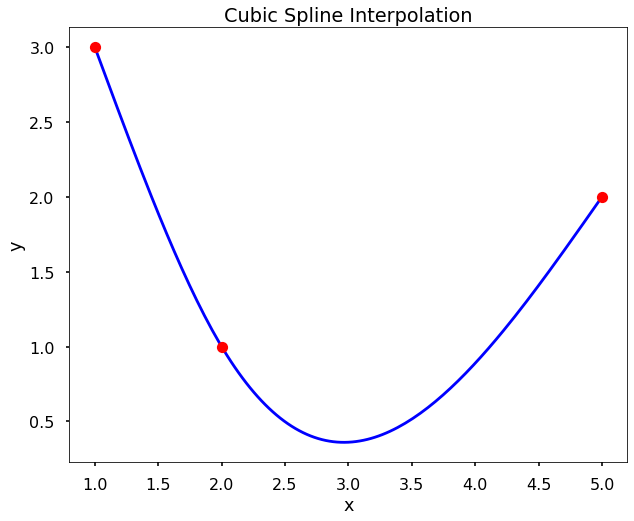

In [37]:
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [213]:
# This program only works for 1 float X at a time. X is not an array. 
def my_cubic_spline(x, y, X):
    N = len(x) - 1
    m = [] 
    n = [] 
    A = []
    B = []
    C = []
    D = []
    second_der = []
    result = 0

    for i in range(N):
      m =  m + [(x[i+1] - x[i])]      

    for i in range(N):
      n = n + [(y[i+1] - y[i]) / m[i]]    
    
    for i in range(N-1):
      second_der = second_der + [3 * (n[i+1] - n[i]) / (m[i+1] + m[i])]

    second_der = [0] + second_der +[0]
    
    for i in range(N):
      A = A + [(second_der[i+1] - second_der[i]) / (6 * m[i])]   

    for i in range(N):
      B = B + [second_der[i] / 2]

    for i in range(N):
      C = C + [n[i] - m[i] * (second_der[i+1] + 2 * second_der[i]) / 6]

    for i in range(N):     
      D = D + [y[i]] 

    for i in range(N):
      for k in range(len(X)):
        if X[k] > x[i] and X[k] < x[i+1]:
          print('A =' + str(A[i]))
          print('B =' + str(B[i]))
          print('C =' + str(C[i]))
          print('D =' + str(D[i]))
          print('The function is f(x) = A_final(x-x_final)^3 + B_final(x-x_final)^2 + C_final(x-x_final) + D_final')
          x_final = x[i]
          A_final = A[i]
          B_final = B[i]
          C_final = C[i]
          D_final = D[i]
          result = A_final* pow((X[k]-x_final),3) + B_final*pow((X[k]-x_final),2) + C_final*(X[k]-x_final) + D_final
          print(result)
        else: 
          break

In [212]:
x = np.array([1, 2, 5])
y = np.array([3, 1, 2])
X = [1.96]
my_cubic_spline(x, y, X)

A =0.2916666666666667
B =0.0
C =-2.2916666666666665
D =3
The function is f(x) = A_final(x-x_final)^3 + B_final(x-x_final)^2 + C_final(x-x_final) + D_final
1.0580480000000003


In [211]:
#check
x = [1, 2, 5]
y = [3, 1, 2]
# use bc_type = 'natural' adds the constraints
f = CubicSpline(x, y, bc_type='natural')
f(1.96)

array(1.058048)